<a href="https://colab.research.google.com/github/cclgdxdw/Olivetti-Faces/blob/main/Olivetti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
y = olivetti.target

In [ ]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [ ]:
olivetti.data.shape

(400, 4096)

# Show Distinct People in the Olivetti Dataset

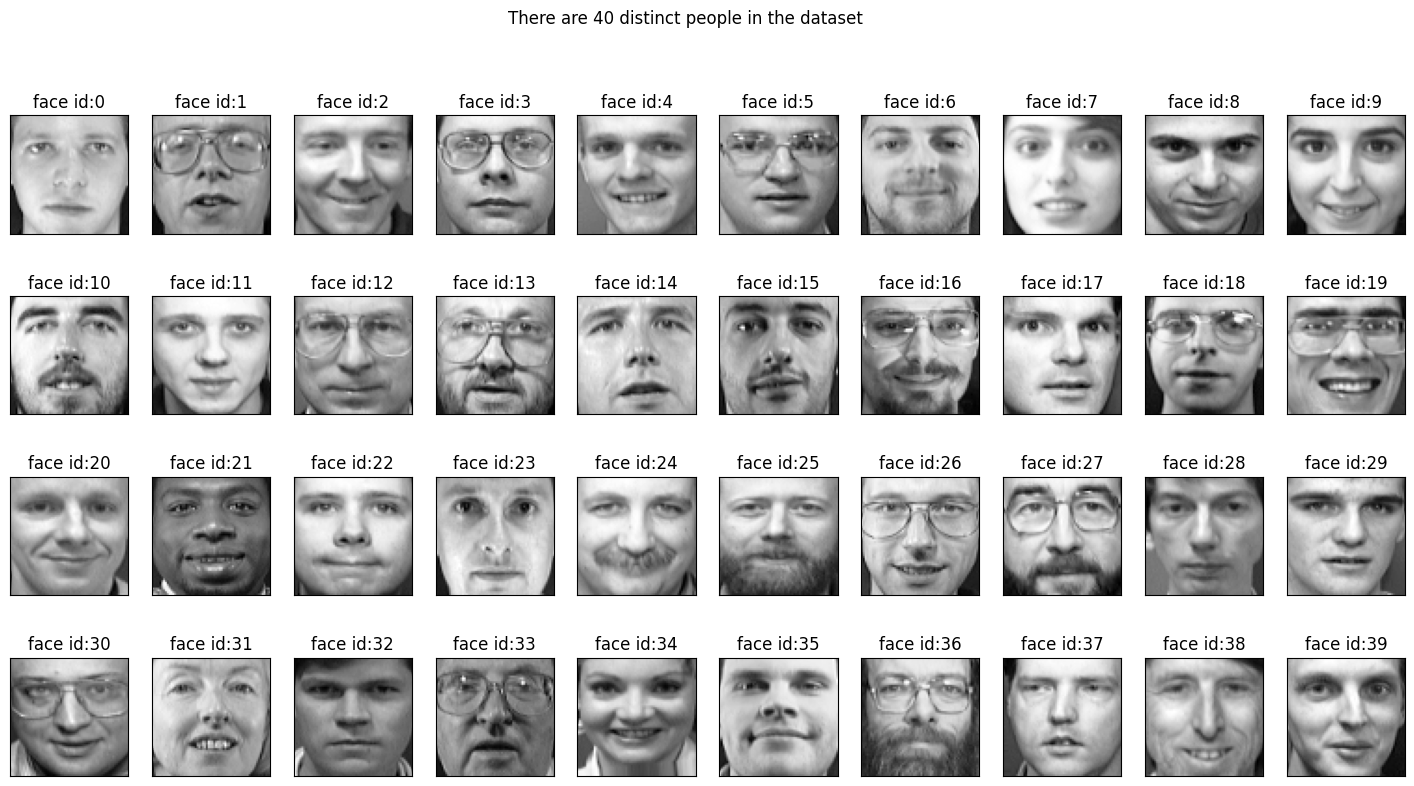

In [ ]:
olivetti_3d = olivetti.data.reshape(400, 64, 64)

import matplotlib.pyplot as plt
import numpy as np

def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()

    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

show_40_distinct_people(olivetti_3d, np.unique(y))

# PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X = pca.fit_transform(olivetti.data)

pca.n_components_

260

# K-Means

In [ ]:
from sklearn.cluster import KMeans

k_range = range(5, 200)
kmeans_per_k = []
for k in k_range:
  kmeans = KMeans(n_clusters=k, n_init='auto')
  kmeans.fit(X)
  kmeans_per_k.append(kmeans)

## K-Means Silhouette Score

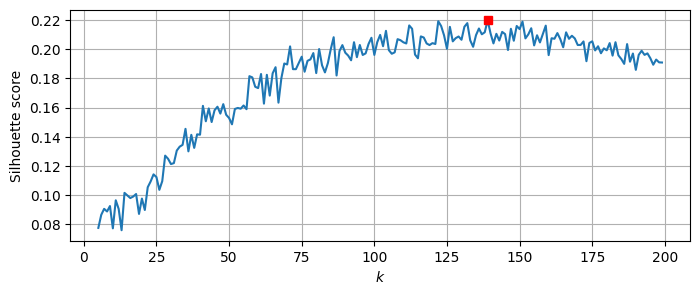

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores)
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

In [ ]:
print(f'best k : {best_k}\nbest score: {best_score}')

best k : 139
best score: 0.2199014276266098


It looks like the best number of clusters is quite high, at ___. You might have expected it to be 40, since there are 40 different people on the pictures. However, the same person may look quite different on different pictures (e.g., with or without glasses, or simply shifted left or right).

## K-Means Inertias

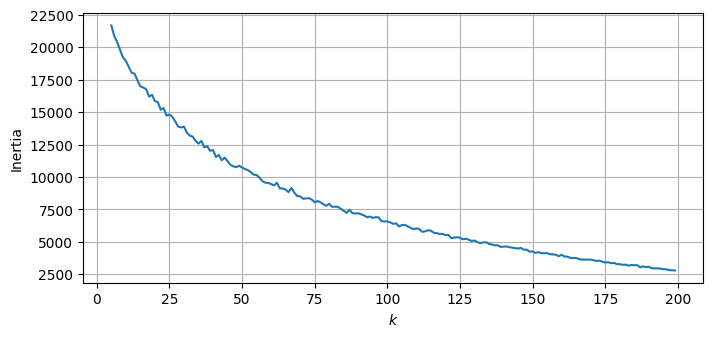

In [ ]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias)
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.grid()
plt.show()

The optimal number of clusters is not clear on this inertia diagram, as there is no obvious elbow, so let's stick with k=___.

# Visualize the clusters

In [ ]:
best_model = kmeans_per_k[best_index]

def plot_faces(faces, labels, n_cols=6):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = olivetti.data[in_cluster]
    labels = y[in_cluster]
    plot_faces(faces, labels)


NameError: ignored

About 2 out of 3 clusters are useful: that is, they contain at least 2 pictures, all of the same person. However, the rest of the clusters have either one or more intruders, or they have just a single picture.

Clustering images this way may be too imprecise to be directly useful when training a model (as we will see below), but it can be tremendously useful when labeling images in a new dataset: it will usually make labelling much faster.

## Take a look at when k=40

Cluster 0


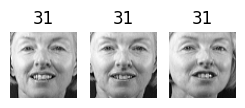

Cluster 1


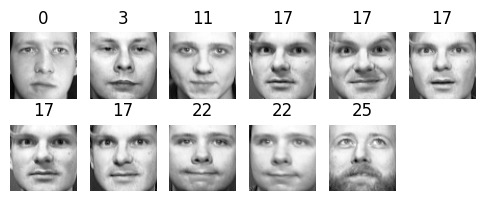

Cluster 2


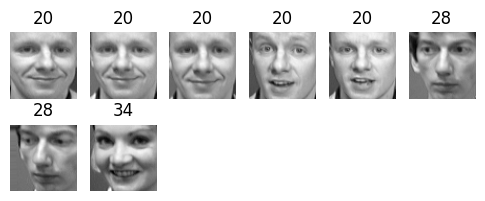

Cluster 3


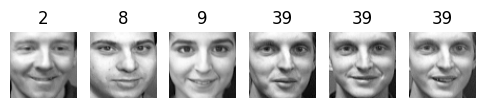

Cluster 4


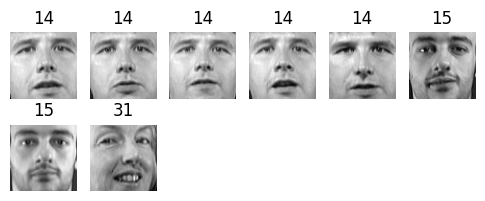

Cluster 5


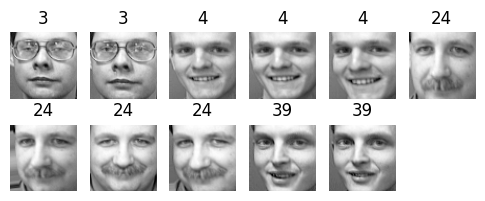

Cluster 6


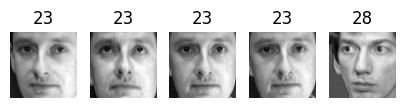

Cluster 7


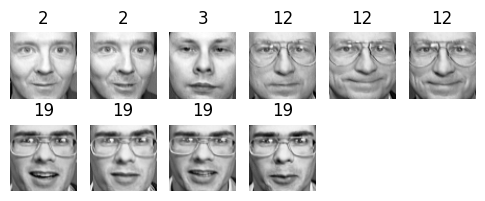

Cluster 8


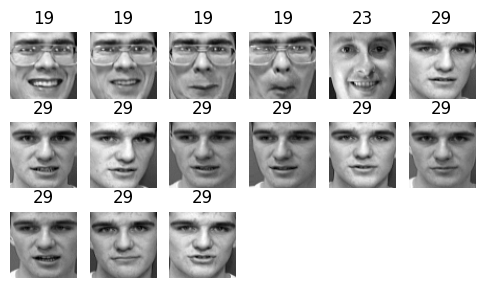

Cluster 9


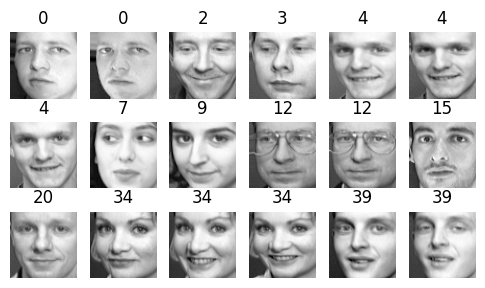

Cluster 10


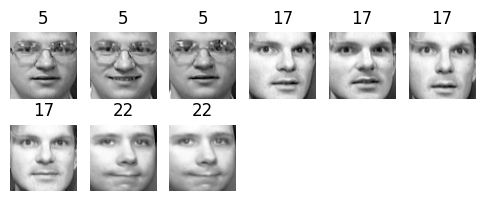

Cluster 11


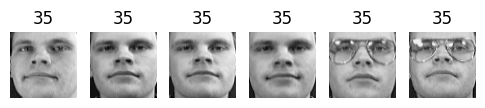

Cluster 12


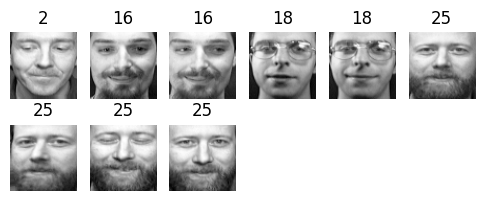

Cluster 13


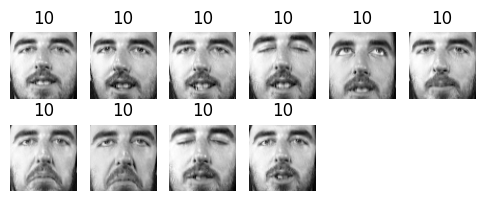

Cluster 14


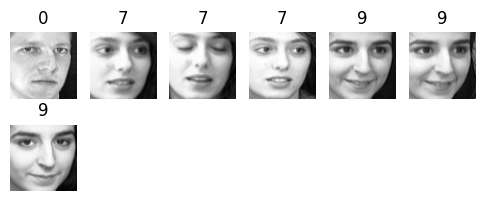

Cluster 15


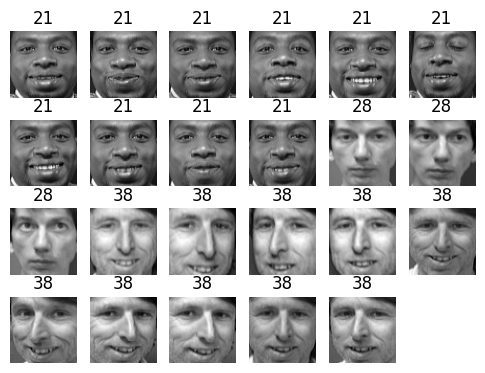

Cluster 16


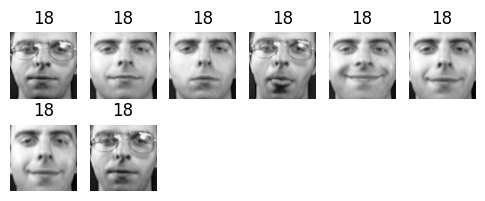

Cluster 17


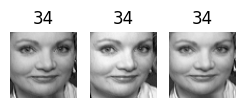

Cluster 18


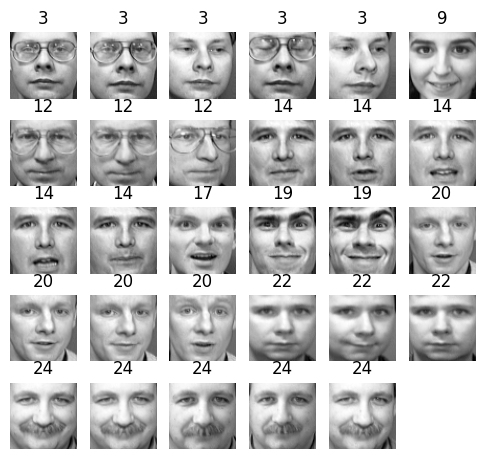

Cluster 19


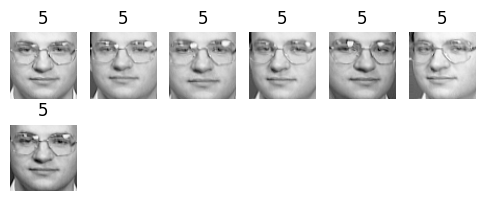

Cluster 20


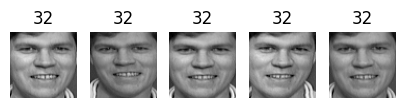

Cluster 21


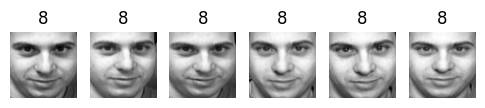

Cluster 22


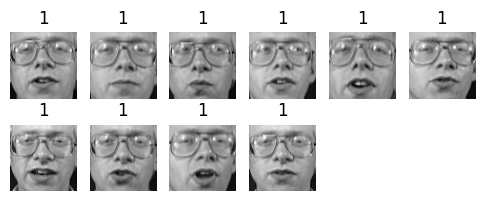

Cluster 23


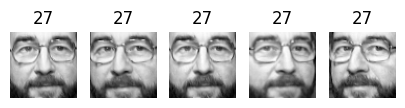

Cluster 24


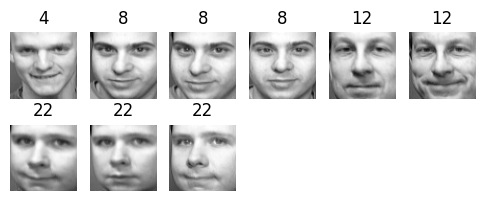

Cluster 25


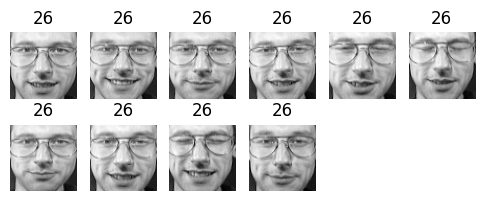

Cluster 26


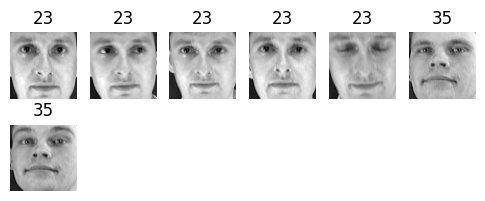

Cluster 27


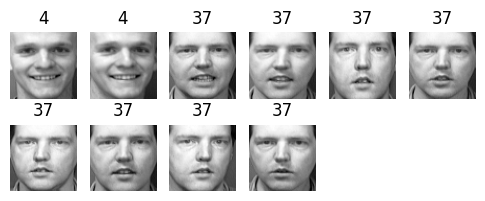

Cluster 28


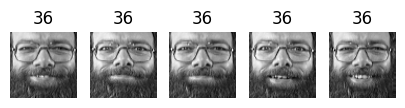

Cluster 29


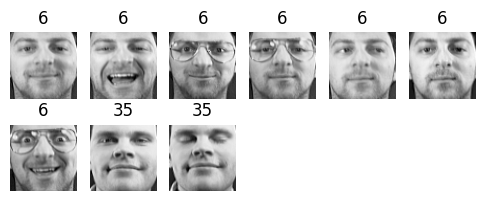

Cluster 30


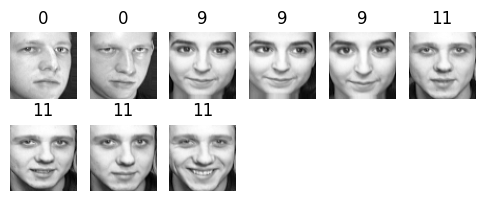

Cluster 31


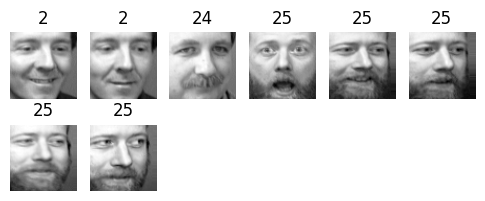

Cluster 32


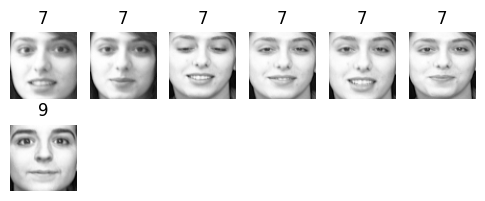

Cluster 33


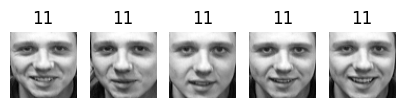

Cluster 34


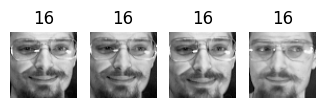

Cluster 35


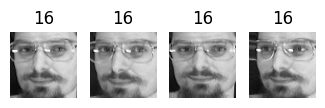

Cluster 36


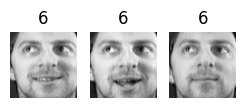

Cluster 37


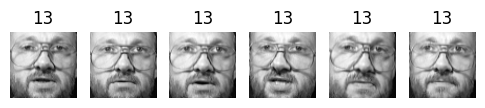

Cluster 38


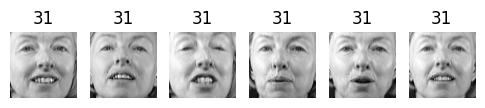

Cluster 39


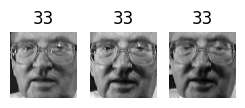

Cluster 40


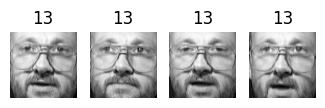

Cluster 41


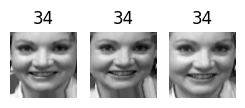

Cluster 42


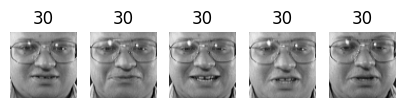

Cluster 43


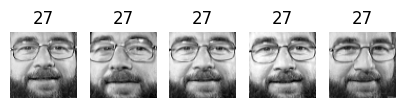

Cluster 44


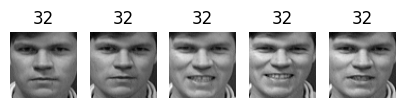

Cluster 45


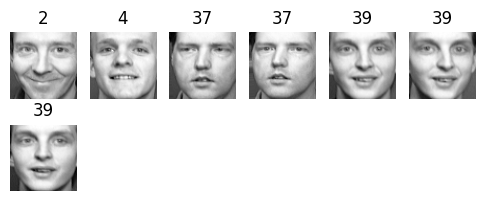

Cluster 46


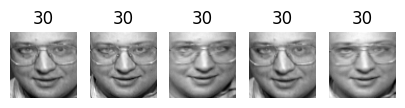

Cluster 47


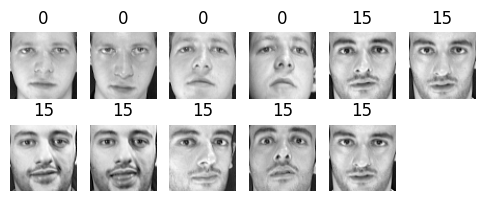

Cluster 48


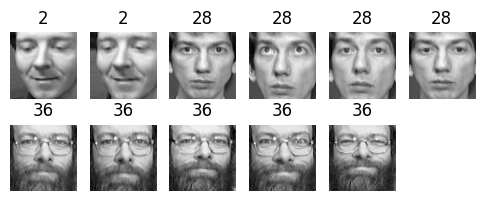

Cluster 49


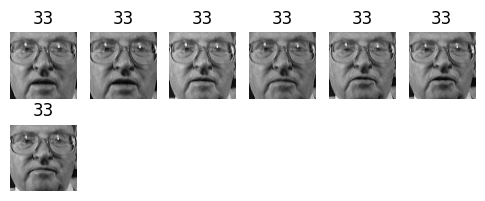

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def plot_faces(faces, labels, n_cols=6):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

kmeans_50 = KMeans(n_clusters=50, n_init='auto')
kmeans_50.fit(X)

for cluster_id in np.unique(kmeans_50.labels_):
    print("Cluster", cluster_id)
    in_cluster = kmeans_50.labels_==cluster_id
    faces = olivetti.data[in_cluster]
    labels = y[in_cluster]
    plot_faces(faces, labels)

# Agglomerative Clustering

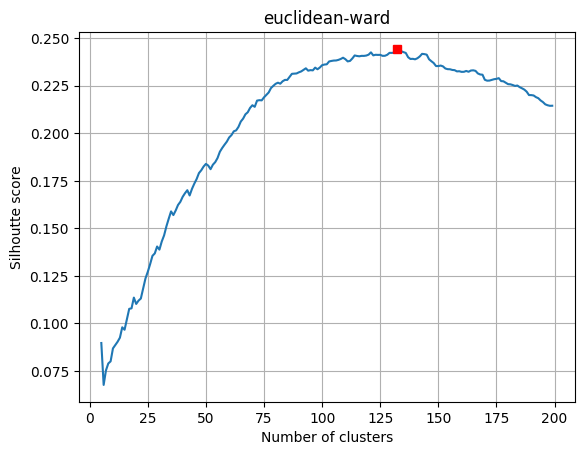

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# euclidean-ward
silhouette_scores = []
for n_clusters in k_range:
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='euclidean',
                                             linkage='ward')
    agg_labels = agg_clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, agg_labels))

best_index_euclidean_ward = np.argmax(silhouette_scores)
best_k_euclidean_ward = k_range[best_index_euclidean_ward]
best_score_euclidean_ward = silhouette_scores[best_index_euclidean_ward]

plt.plot(k_range, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('euclidean-ward')
plt.plot(best_k_euclidean_ward, best_score_euclidean_ward, "rs")
plt.grid()
plt.show()


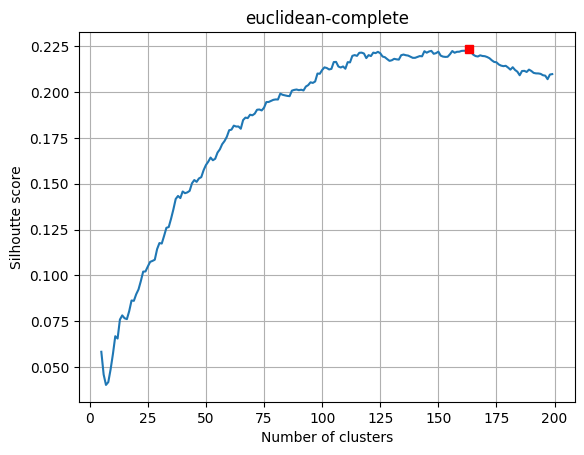

In [ ]:
# euclidean-complete
silhouette_scores = []
for n_clusters in k_range:
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='euclidean',
                                             linkage='complete')
    agg_labels = agg_clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, agg_labels))

best_index_euclidean_complete = np.argmax(silhouette_scores)
best_k_euclidean_complete = k_range[best_index_euclidean_complete]
best_score_euclidean_complete = silhouette_scores[best_index_euclidean_complete]

plt.plot(k_range, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('euclidean-complete')
plt.plot(best_k_euclidean_complete, best_score_euclidean_complete, "rs")
plt.grid()
plt.show()

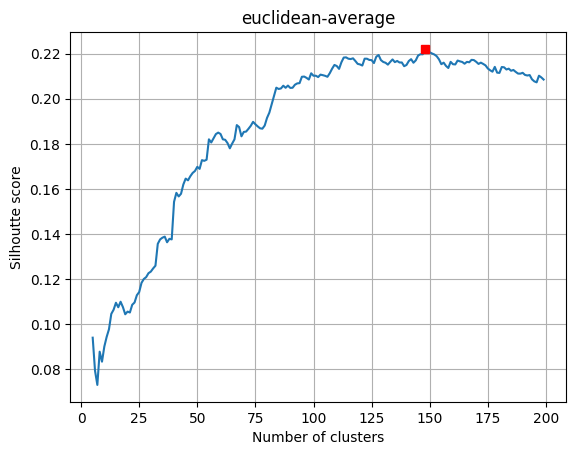

In [ ]:
# euclidean-average
silhouette_scores = []
for n_clusters in k_range:
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='euclidean',
                                             linkage='average')
    agg_labels = agg_clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, agg_labels))

best_index_euclidean_average = np.argmax(silhouette_scores)
best_k_euclidean_average = k_range[best_index_euclidean_average]
best_score_euclidean_average = silhouette_scores[best_index_euclidean_average]

plt.plot(k_range, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('euclidean-average')
plt.plot(best_k_euclidean_average, best_score_euclidean_average, "rs")
plt.grid()
plt.show()

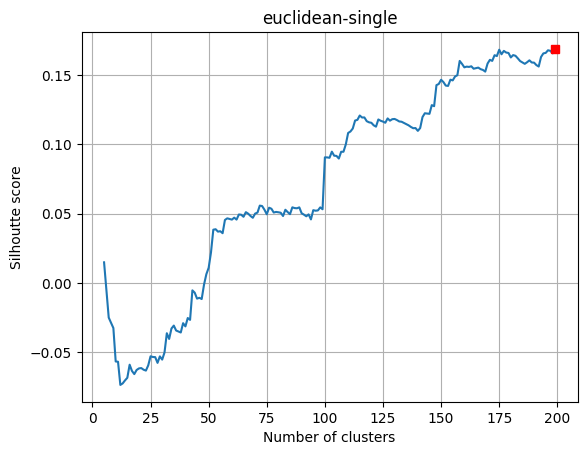

In [ ]:
# euclidean-single
silhouette_scores = []
for n_clusters in k_range:
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='euclidean',
                                             linkage='single')
    agg_labels = agg_clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, agg_labels))

best_index_euclidean_single = np.argmax(silhouette_scores)
best_k_euclidean_single = k_range[best_index_euclidean_single]
best_score_euclidean_single = silhouette_scores[best_index_euclidean_single]

plt.plot(k_range, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('euclidean-single')
plt.plot(best_k_euclidean_single, best_score_euclidean_single, "rs")
plt.grid()
plt.show()

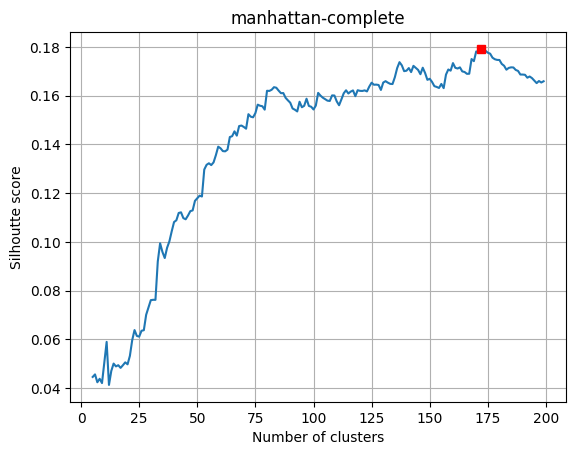

In [ ]:
# manhattan-complete
silhouette_scores = []
for n_clusters in k_range:
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='manhattan',
                                             linkage='complete')
    agg_labels = agg_clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, agg_labels))

best_index_manhattan_complete = np.argmax(silhouette_scores)
best_k_manhattan_complete = k_range[best_index_manhattan_complete]
best_score_manhattan_complete = silhouette_scores[best_index_manhattan_complete]

plt.plot(k_range, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('manhattan-complete')
plt.plot(best_k_manhattan_complete, best_score_manhattan_complete, "rs")
plt.grid()
plt.show()


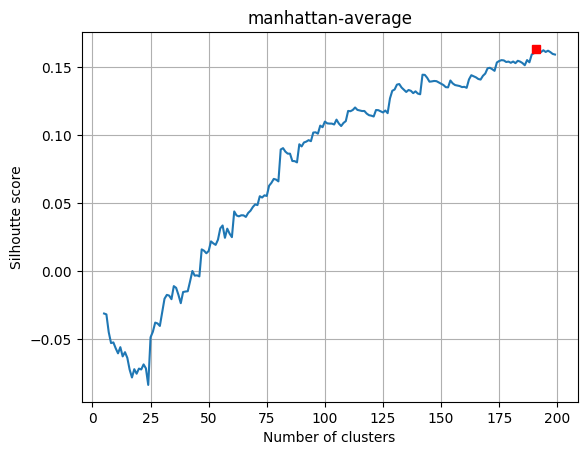

In [ ]:
# manhattan-average
silhouette_scores = []
for n_clusters in k_range:
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='manhattan',
                                             linkage='average')
    agg_labels = agg_clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, agg_labels))

best_index_manhattan_average = np.argmax(silhouette_scores)
best_k_manhattan_average = k_range[best_index_manhattan_average]
best_score_manhattan_average = silhouette_scores[best_index_manhattan_average]

plt.plot(k_range, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('manhattan-average')
plt.plot(best_k_manhattan_average, best_score_manhattan_average, "rs")
plt.grid()
plt.show()

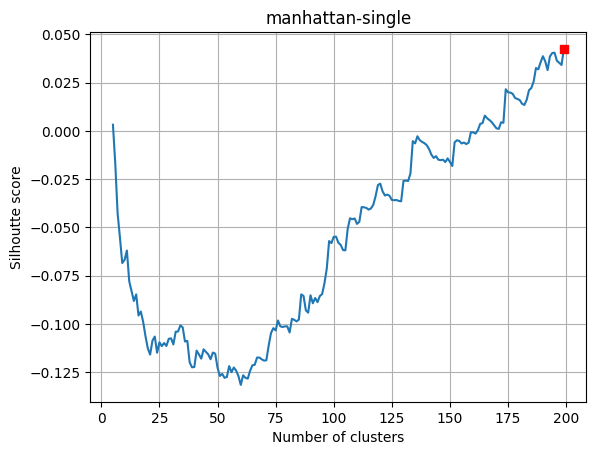

In [ ]:
# manhattan-single
silhouette_scores = []
for n_clusters in k_range:
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='manhattan',
                                             linkage='single')
    agg_labels = agg_clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, agg_labels))

best_index_manhattan_single = np.argmax(silhouette_scores)
best_k_manhattan_single = k_range[best_index_manhattan_single]
best_score_manhattan_single = silhouette_scores[best_index_manhattan_single]

plt.plot(k_range, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('manhattan-single')
plt.plot(best_k_manhattan_single, best_score_manhattan_single, "rs")
plt.grid()
plt.show()

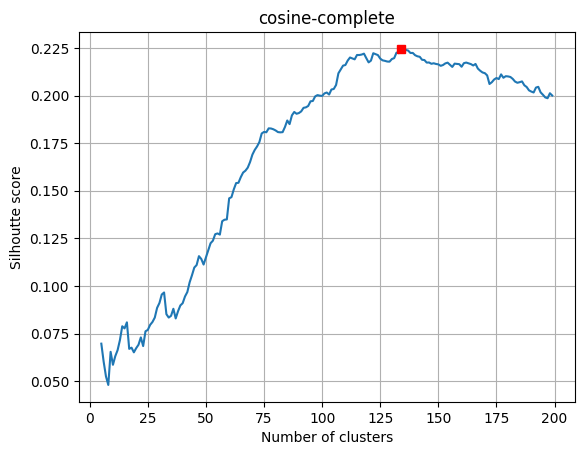

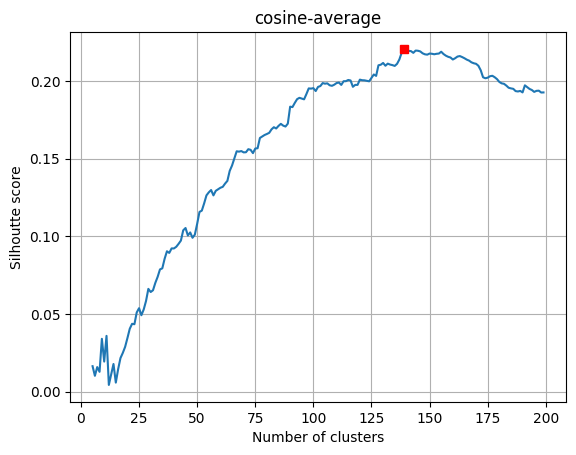

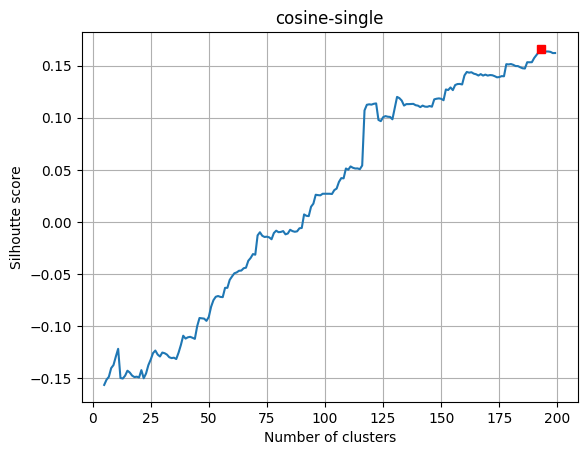

In [ ]:
# cosine-complete
silhouette_scores = []
for n_clusters in k_range:
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='cosine',
                                             linkage='complete')
    agg_labels = agg_clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, agg_labels))

best_index_cosine_complete = np.argmax(silhouette_scores)
best_k_cosine_complete = k_range[best_index_cosine_complete]
best_score_cosine_complete = silhouette_scores[best_index_cosine_complete]

plt.plot(k_range, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('cosine-complete')
plt.plot(best_k_cosine_complete, best_score_cosine_complete, "rs")
plt.grid()
plt.show()

# cosine-average
silhouette_scores = []
for n_clusters in k_range:
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='cosine',
                                             linkage='average')
    agg_labels = agg_clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, agg_labels))

best_index_cosine_average = np.argmax(silhouette_scores)
best_k_cosine_average = k_range[best_index_cosine_average]
best_score_cosine_average = silhouette_scores[best_index_cosine_average]

plt.plot(k_range, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('cosine-average')
plt.plot(best_k_cosine_average, best_score_cosine_average, "rs")
plt.grid()
plt.show()

# cosine-single
silhouette_scores = []
for n_clusters in k_range:
    agg_clustering = AgglomerativeClustering(n_clusters = n_clusters,
                                             metric='cosine',
                                             linkage='single')
    agg_labels = agg_clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, agg_labels))

best_index_cosine_single = np.argmax(silhouette_scores)
best_k_cosine_single = k_range[best_index_cosine_single]
best_score_cosine_single = silhouette_scores[best_index_cosine_single]

plt.plot(k_range, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('cosine-single')
plt.plot(best_k_cosine_single, best_score_cosine_single, "rs")
plt.grid()
plt.show()


## Compare the result

In [ ]:
import pandas as pd

results = {
    "Configuration": ["euclidean-ward", "euclidean-complete", "euclidean-average", "euclidean-single",
                      "manhattan-complete", "manhattan-average", "manhattan-single",
                      "cosine-complete", "cosine-average", "cosine-single"],
    "Best K": [best_k_euclidean_ward, best_k_euclidean_complete, best_k_euclidean_average, best_k_euclidean_single,
               best_k_manhattan_complete, best_k_manhattan_average, best_k_manhattan_single,
               best_k_cosine_complete, best_k_cosine_average, best_k_cosine_single],
    "Best Silhouette Score": [best_score_euclidean_ward, best_score_euclidean_complete, best_score_euclidean_average, best_score_euclidean_single,
                              best_score_manhattan_complete, best_score_manhattan_average, best_score_manhattan_single,
                              best_score_cosine_complete, best_score_cosine_average, best_score_cosine_single]
}

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Display the DataFrame
print(df_results)

        Configuration  Best K  Best Silhouette Score
0      euclidean-ward     132               0.244383
1  euclidean-complete     163               0.223546
2   euclidean-average     148               0.222101
3    euclidean-single     199               0.168866
4  manhattan-complete     172               0.179192
5   manhattan-average     191               0.163170
6    manhattan-single     199               0.042458
7     cosine-complete     134               0.224513
8      cosine-average     139               0.220701
9       cosine-single     193               0.165933


## Visualize the Configuration with Best Score




Cluster 0


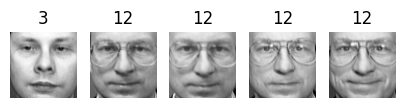

Cluster 1


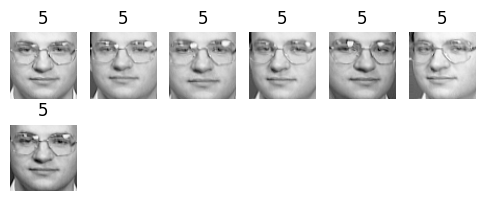

Cluster 2


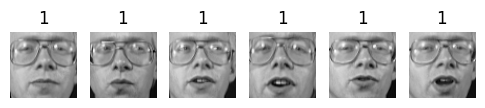

Cluster 3


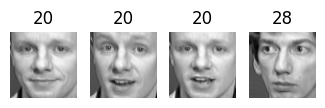

Cluster 4


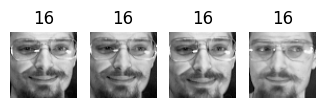

Cluster 5


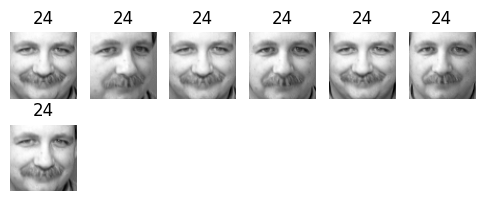

Cluster 6


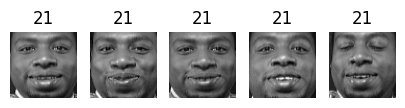

Cluster 7


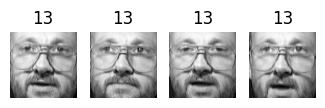

Cluster 8


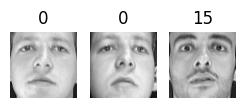

Cluster 9


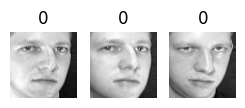

Cluster 10


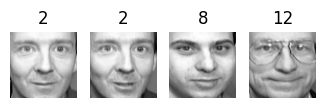

Cluster 11


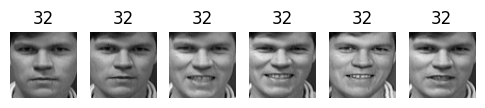

Cluster 12


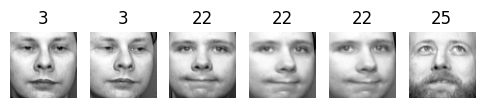

Cluster 13


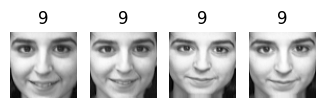

Cluster 14


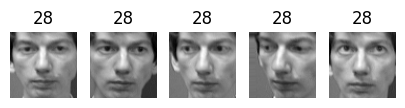

Cluster 15


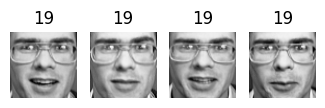

Cluster 16


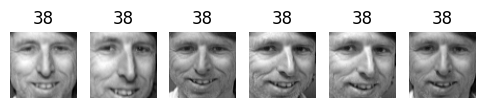

Cluster 17


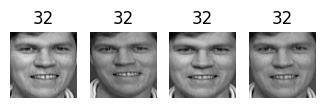

Cluster 18


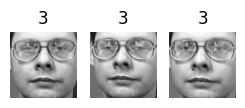

Cluster 19


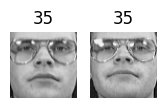

Cluster 20


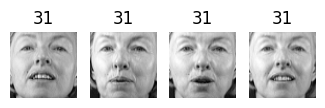

Cluster 21


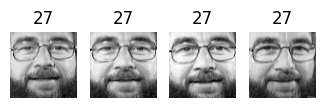

Cluster 22


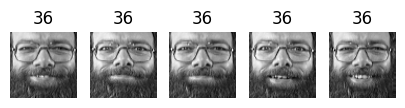

Cluster 23


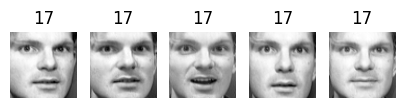

Cluster 24


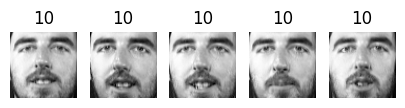

Cluster 25


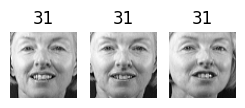

Cluster 26


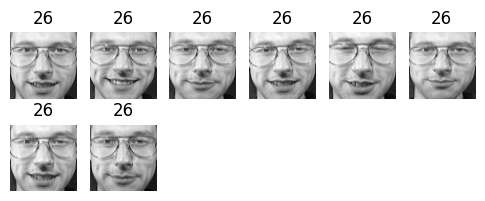

Cluster 27


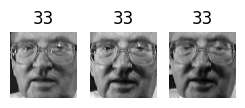

Cluster 28


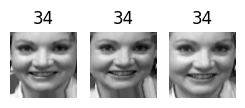

Cluster 29


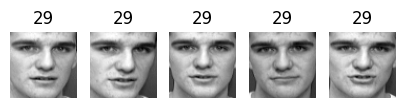

Cluster 30


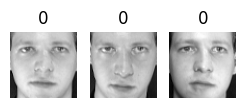

Cluster 31


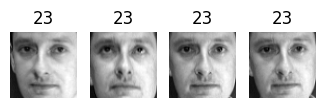

Cluster 32


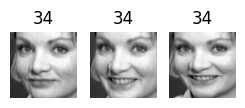

Cluster 33


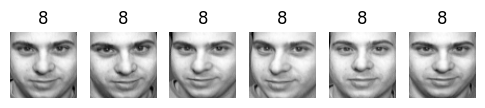

Cluster 34


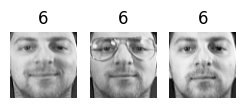

Cluster 35


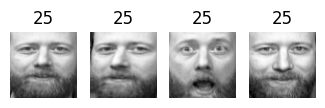

Cluster 36


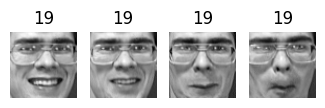

Cluster 37


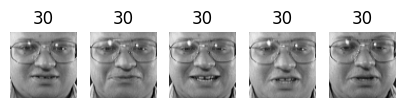

Cluster 38


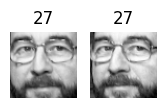

Cluster 39


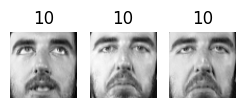

Cluster 40


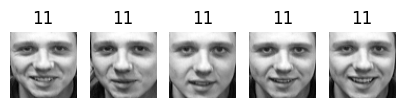

Cluster 41


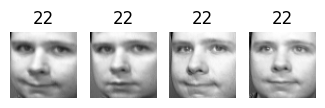

Cluster 42


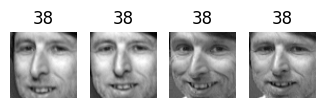

Cluster 43


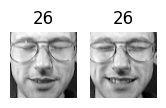

Cluster 44


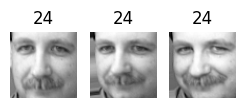

Cluster 45


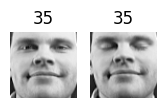

Cluster 46


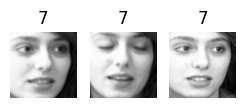

Cluster 47


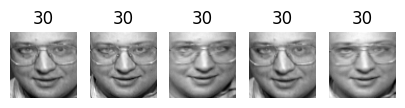

Cluster 48


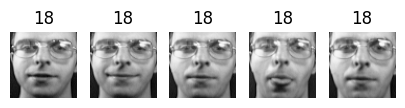

Cluster 49


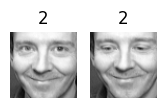

Cluster 50


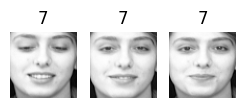

Cluster 51


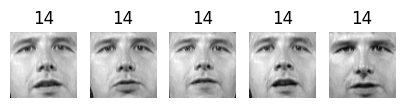

Cluster 52


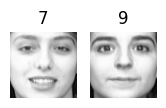

Cluster 53


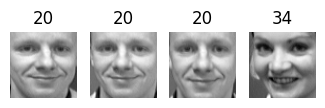

Cluster 54


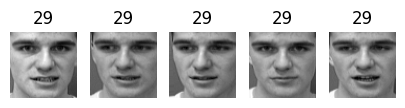

Cluster 55


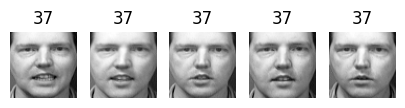

Cluster 56


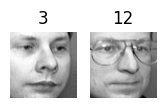

Cluster 57


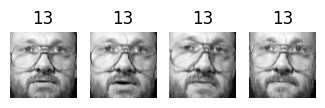

Cluster 58


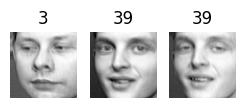

Cluster 59


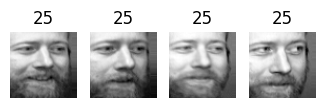

Cluster 60


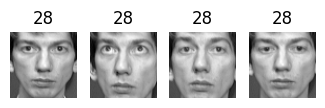

Cluster 61


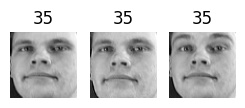

Cluster 62


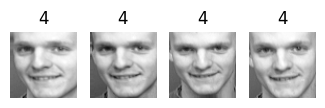

Cluster 63


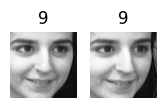

Cluster 64


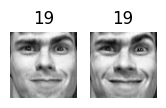

Cluster 65


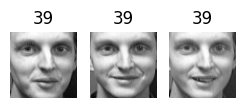

Cluster 66


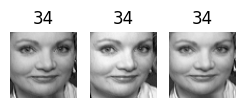

Cluster 67


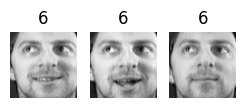

Cluster 68


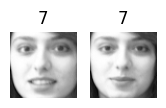

Cluster 69


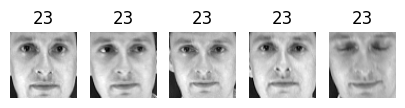

Cluster 70


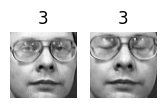

Cluster 71


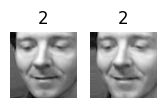

Cluster 72


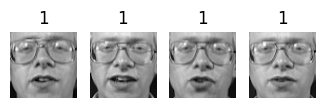

Cluster 73


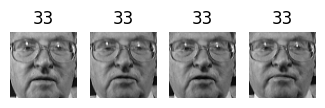

Cluster 74


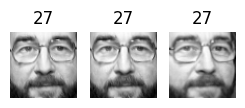

Cluster 75


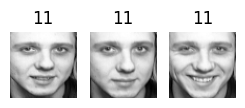

Cluster 76


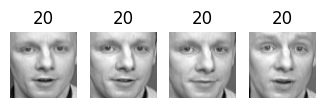

Cluster 77


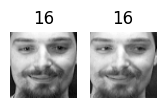

Cluster 78


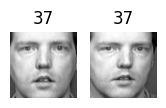

Cluster 79


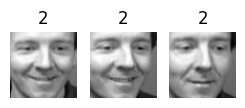

Cluster 80


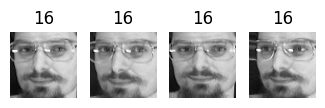

Cluster 81


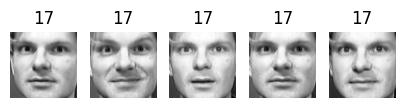

Cluster 82


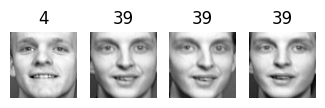

Cluster 83


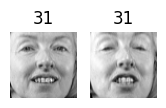

Cluster 84


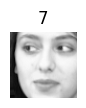

Cluster 85


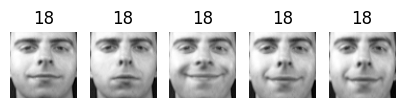

Cluster 86


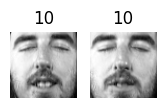

Cluster 87


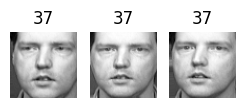

Cluster 88


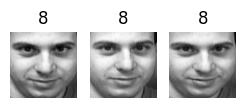

Cluster 89


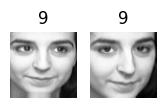

Cluster 90


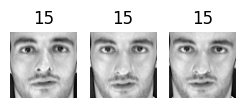

Cluster 91


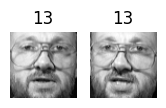

Cluster 92


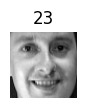

Cluster 93


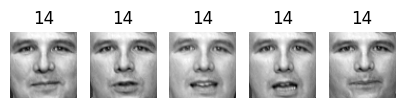

Cluster 94


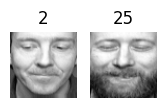

Cluster 95


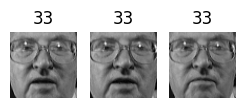

Cluster 96


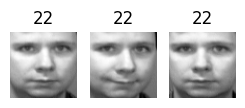

Cluster 97


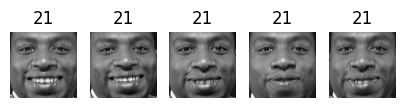

Cluster 98


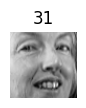

Cluster 99


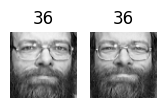

Cluster 100


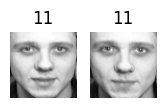

Cluster 101


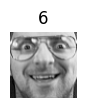

Cluster 102


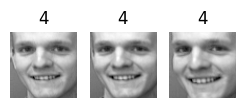

Cluster 103


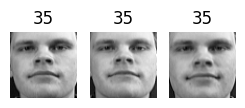

Cluster 104


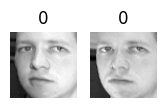

Cluster 105


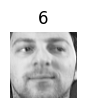

Cluster 106


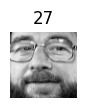

Cluster 107


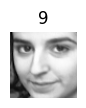

Cluster 108


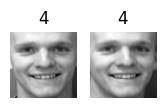

Cluster 109


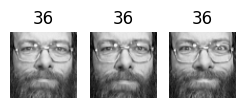

Cluster 110


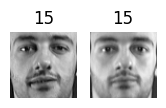

Cluster 111


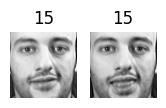

Cluster 112


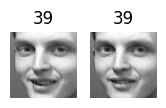

Cluster 113


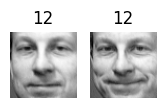

Cluster 114


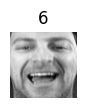

Cluster 115


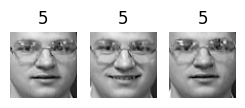

Cluster 116


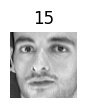

Cluster 117


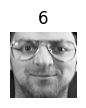

Cluster 118


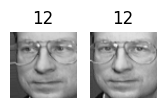

Cluster 119


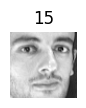

In [ ]:
best_agg_clustering = AgglomerativeClustering(n_clusters = 120,
                                             metric='euclidean',
                                             linkage='ward')

best_agg_labels = best_agg_clustering.fit_predict(X)

for cluster_id in np.unique(best_agg_labels):
    print("Cluster", cluster_id)
    in_cluster = best_agg_labels==cluster_id
    faces = olivetti.data[in_cluster]
    labels = y[in_cluster]
    plot_faces(faces, labels)

# DBSCAN

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
dbscan_results = {}
for eps in np.arange(1, 10.5, 0.5):
  dbscan = DBSCAN(eps=eps, min_samples=2)
  dbscan.fit(X)
  dbscan_results[eps] = dbscan.labels_
# 检查结果，打印每个eps对应的簇数量
for eps, labels in dbscan_results.items():
  n_clusters = len(set(labels)) - (1 if -1 in labels else 0) # 忽略噪声点
  n_noise_points = np.count_nonzero(labels == -1)
  print(f'eps: {eps:.1f}, clusters: {n_clusters}')
  print('Number of noise points:', n_noise_points)

eps: 1.0, clusters: 0
Number of noise points: 400
eps: 1.5, clusters: 2
Number of noise points: 396
eps: 2.0, clusters: 5
Number of noise points: 390
eps: 2.5, clusters: 8
Number of noise points: 384
eps: 3.0, clusters: 13
Number of noise points: 372
eps: 3.5, clusters: 22
Number of noise points: 348
eps: 4.0, clusters: 44
Number of noise points: 297
eps: 4.5, clusters: 61
Number of noise points: 239
eps: 5.0, clusters: 67
Number of noise points: 194
eps: 5.5, clusters: 74
Number of noise points: 150
eps: 6.0, clusters: 68
Number of noise points: 106
eps: 6.5, clusters: 59
Number of noise points: 66
eps: 7.0, clusters: 47
Number of noise points: 43
eps: 7.5, clusters: 36
Number of noise points: 21
eps: 8.0, clusters: 16
Number of noise points: 11
eps: 8.5, clusters: 12
Number of noise points: 5
eps: 9.0, clusters: 5
Number of noise points: 2
eps: 9.5, clusters: 2
Number of noise points: 0
eps: 10.0, clusters: 1
Number of noise points: 0


In [ ]:
def print_cluster_stats(dbscan):
    labels = dbscan.labels_

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_points = np.count_nonzero(labels == -1)

    print('Number of clusters:', n_clusters)
    print('Number of noise points:', n_noise_points)

In [ ]:
print_cluster_stats(dbscan)

Number of clusters: 1
Number of noise points: 0


In [ ]:
dbscan.labels_

array([ 0, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1, -1,  0,
        1, -1,  2,  2,  0,  3,  0,  0,  3,  0, -1,  3,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  4,  4,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,
        6,  6,  5, -1,  0,  0,  0,  7,  7,  0,  0,  7,  0,  0,  7,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  8,  0,  8,  8,  8,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
# GMM

In [ ]:
from sklearn.mixture import GaussianMixture

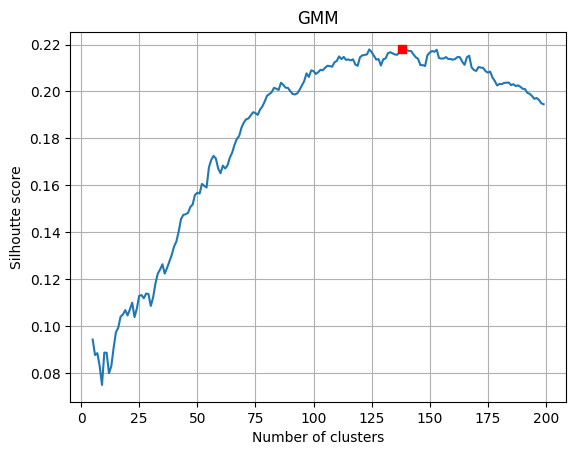

In [ ]:
silhouette_scores = []
for n_clusters in k_range:
    gmm = GaussianMixture(n_components=n_clusters,
                          random_state=42)
    gmm_labels = gmm.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, gmm_labels))

best_index_gmm = np.argmax(silhouette_scores)
best_k_gmm = k_range[best_index_gmm]
best_score_gmm = silhouette_scores[best_index_gmm]

plt.plot(k_range, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('GMM')
plt.plot(best_k_gmm, best_score_gmm, "rs")
plt.grid()
plt.show()

In [ ]:
best_k_gmm

138

In [ ]:
best_score_gmm

0.21813121

# Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering()
sc.fit(X)

SpectralClustering()

In [ ]:
sc.n_clusters

8

In [ ]:
sc.labels_

array([0, 7, 0, 0, 6, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 5, 0, 0, 0, 4, 0, 0, 4, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22